In [139]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand

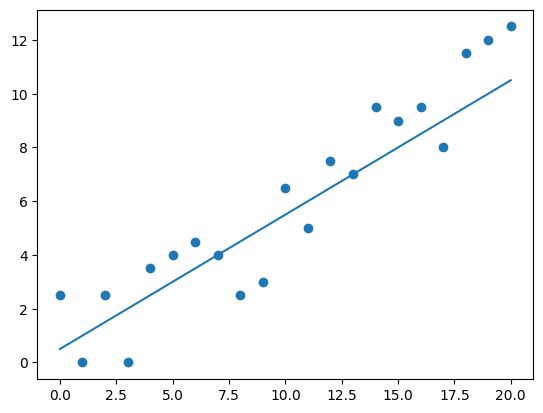

In [140]:
#Random sample generator

def eq(x):

    a = 0.5
    b = 0.5
    f_x = a*x + b

    return f_x

def add_noise(y):
    list = []
    for a in range (len(y)):

        noise = rand.randint(-2,2)

        y_new = y[a] + noise

        list.append(y_new)
    
    return list

x_domain = np.linspace(0,20,21)
y_domain = eq(x_domain)
y_domain_w_noise = add_noise(y_domain)


def plot():
    
    plt.plot(x_domain,y_domain)
    plt.scatter(x_domain,y_domain_w_noise)
    plt.show()
plot()

In [ ]:
#2x2 linear system solver

x_0 = [1,2]
x_1 = [3,4]

A = np.array([x_0,x_1])


def det_2x2(test_arr):

    det_value = test_arr[0,0] * test_arr[1,1] - test_arr[0,1] * test_arr[1,0]

    return det_value

def inverse_2x2(test_arr):

    x_0 = [test_arr[1,1], -1*test_arr[0,1]]
    x_1 = [-1*test_arr[1,0], test_arr[0,0]]

    arr = np.array([x_0,x_1])/(det_2x2(test_arr))

    return arr

def sqaure_row_nxn(test_arr,row_vector):
    
    list_0 = np.array([0] * len(row_vector))

    for a in range (len(row_vector)):
        b = 0
        list_1 = []
        while b < len(row_vector):

            value = row_vector[a]*test_arr[b,a]
            list_1.append(value)
            b = b + 1
    
        list_0 = np.column_stack((list_0,list_1))
        #print(list_0)
        list_final = np.delete(list_0, 0, axis = 1 )
    
    list_2 = []

    for c in range (len(row_vector)):
            
        value = np.sum(list_final[c])
        list_2.append(value)

    return np.array(list_2)

def solver_2x2(test_arr,row_vector):

    invese = inverse_2x2(test_arr)

    solution = sqaure_row_nxn(invese,row_vector)

    return solution

In [ ]:
def comp_2x2_solver(test_arr,row_vector):

    def det_2x2(test_arr):

        det_value = test_arr[0,0] * test_arr[1,1] - test_arr[0,1] * test_arr[1,0]

        return det_value
    
    def inverse_2x2(test_arr):

        x_0 = [test_arr[1,1], -1*test_arr[0,1]]
        x_1 = [-1*test_arr[1,0], test_arr[0,0]]

        arr = np.array([x_0,x_1])/(det_2x2(test_arr))

        return arr
    
    def sqaure_row_nxn(test_arr,row_vector):
        
        list_0 = np.array([0] * len(row_vector))

        for a in range (len(row_vector)):
            b = 0
            list_1 = []
            while b < len(row_vector):

                value = row_vector[a]*test_arr[b,a]
                list_1.append(value)
                b = b + 1
        
            list_0 = np.column_stack((list_0,list_1))
            #print(list_0)
            list_final = np.delete(list_0, 0, axis = 1 )
        
        list_2 = []

        for c in range (len(row_vector)):
                
            value = np.sum(list_final[c])
            list_2.append(value)
            
        return np.array(list_2)
    
    invese = inverse_2x2(test_arr)

    solution = sqaure_row_nxn(invese,row_vector)

    return solution 

In [147]:
b_0 = [1,2]
b_1 = [3,4]

A = np.array([b_0,b_1])
row = np.array([1,2])

a = comp_2x2_solver(A,row)

print(a)

[0.  0.5]


In [ ]:
#line of best fit generator

def linear_fit(x_values,y_values):

    a = np.sum(x_values**2)
    b = np.sum(x_values)
    c = len(x_values)
    d = np.sum(y_values * x_values)
    e = np.sum(y_values)

    x_0 = np.array([a,b])
    x_1 = np.array([b,c])
    
    A = np.array([x_0,x_1])

    row = np.array([d,e])

    ceoff = comp_2x2_solver(A,row)
    print(ceoff)
    def f_x(x,co):

        a = co[0]
        b = co[1]
        y = a*x + b

        return y
    
    y_fit = f_x(x_values,ceoff)

    return y_fit

[0.56883117 0.24025974]


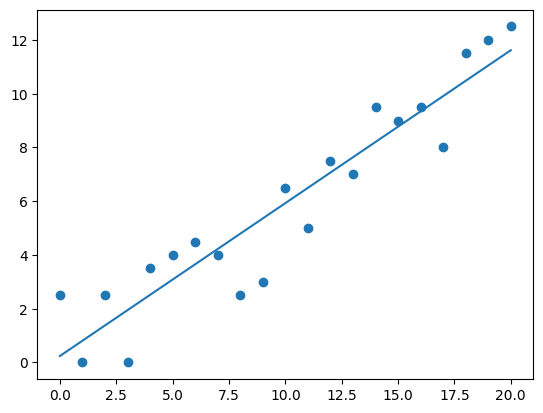

In [149]:
y_fit = linear_fit(x_domain,y_domain_w_noise)

def plot():
    
    plt.plot(x_domain,y_fit)
    plt.scatter(x_domain,y_domain_w_noise)
    plt.show()

plot()